In [ ]:

propH = { 'G':0.53, 'A':1.45, 'V':1.14, 'C':0.77, 'P':0.59, 'L':1.34, 'I':1.00,'M':1.20,'W':1.14,'F':1.12,'K':1.07,'R':0.79,'H':1.24,'S':0.79,'T':0.82,'Y':0.61,'N':0.73,'Q':1.17,'D':0.98,'E':1.53 }

propB = { 'G':0.81, 'A':0.97, 'V':1.65, 'C':1.30, 'P':0.62, 'L':1.22, 'I':1.60,'M':1.67,'W':1.19,'F':1.28,'K':0.74,'R':0.90,'H':0.71,'S':0.72,'T':1.20,'Y':1.29,'N':0.65,'Q':1.23,'D':0.80,'E':0.26 }

print("Welcome to Chou-Fasman method of secondary structure prediction!")
myProtein = input("Enter your protein sequence: ")

def calcNucleationSite(sequence): #this function checks whether the given sequence is a nucleation site for alpha helix or beta strand or not
    if len(sequence) == 6:
        counter = 0
        i = 0;
        while(i<=5):
            if propH[sequence[i]] >= 1:
                counter = counter+1
            i = i+1
        if counter >= 4:
            return True
        else:
            return False
    elif len(sequence) == 5:
        counter = 0
        i = 0;
        while (i <= 4):
            if propB[sequence[i]] >= 1:
                counter = counter + 1
            i = i + 1
        if counter >= 3:
            return True
        else:
            return False

listHelix =[] # we make a list of tuples containing the start_index and end_index for all nucleation sites of alpha helixes
j = 0
size = len(myProtein)
while(j<=size-6): # for populating the list with 6 length sequences of alpha helix nucleation sites
    currentSix = myProtein[j:j+6]
    if calcNucleationSite(currentSix) == True:
        listHelix.append((j,j+6))
    j=j+1


def combineHelixes(listHelix): # this function combines all nucleation sites in listHelix if they are clashing
    j = 0;
    sizeNucleationSite = len(listHelix)
    while (j < sizeNucleationSite - 1):
        if listHelix[j + 1][0] <= listHelix[j][1]:
            newTuple = (listHelix[j][0], listHelix[j + 1][1])
            listHelix.pop(j + 1)
            sizeNucleationSite = sizeNucleationSite - 1
            listHelix[j] = newTuple
        else:
            j = j + 1

combineHelixes(listHelix)

def extendRightHelix(tuple): # this function extends a fragment of helix to the right if possible
    #first we check the right side
    maxLength = len(myProtein)
    if tuple[1] == maxLength:
        return tuple
    else:
        flag = True
        while flag == True:
            newTuple = (tuple[0],tuple[1]+1)
            newSubsequence = myProtein[newTuple[0]:newTuple[1]]
            lastFour = newSubsequence[-4:]
            calculatedPH = propH[lastFour[0]] + propH[lastFour[1]] + propH[lastFour[2]] + propH[lastFour[3]]
            if calculatedPH <4:
                return tuple
            else:
                tuple = newTuple

def extendLeftHelix(tuple): # this function extends a fragment of helix to the left if possible
    #then we check the left side
    if tuple[0] == 0:
        return tuple
    else:
        flag = True
        while flag == True:
            newTuple = (tuple[0]-1,tuple[1])
            newSubsequence = myProtein[newTuple[0]:newTuple[1]]
            firstFour = newSubsequence[:4]
            calculatedPH = propH[firstFour[0]] + propH[firstFour[1]] + propH[firstFour[2]] + propH[firstFour[3]]
            if calculatedPH < 4:
                return tuple
            else:
                tuple = newTuple

def findHelix(listHelix): # this function checks for all helix fragments whether they can be extended or not and extends them and combines them if necessary
    i = 0
    sizeNucleationSite = len(listHelix)
    while(i<sizeNucleationSite):
        listHelix[i] = extendRightHelix(listHelix[i])
        combineHelixes(listHelix)
        sizeChanged = len(listHelix)
        listHelix[i] = extendLeftHelix(listHelix[i])
        combineHelixes(listHelix)
        sizeChanged = len(listHelix)
        if sizeChanged == sizeNucleationSite:
            i=i+1
        else:
            sizeNucleationSite = sizeChanged

findHelix(listHelix)


listStrand = [] # we make a list of tuples containing the start_index and end_index for all nucleation sites of beta strands
j = 0
size = len(myProtein)
while(j<=size-5):# for populating the list with 5 length sequences of beta strand nucleation sites
    currentFive = myProtein[j:j+5]
    if calcNucleationSite(currentFive) == True:
        listStrand.append((j,j+5))
    j=j+1



combineHelixes(listStrand) # we call the same function as for helixes for clashes as it follows the same logic


def extendRightStrand(tuple):# this function extends a fragment of helix to the right if possible
    #first we check the right side
    maxLength = len(myProtein)
    if tuple[1] == maxLength:
        return tuple
    else:
        flag = True
        while flag == True:
            newTuple = (tuple[0],tuple[1]+1)
            newSubsequence = myProtein[newTuple[0]:newTuple[1]]
            lastFour = newSubsequence[-4:]
            calculatedPS = propB[lastFour[0]] + propB[lastFour[1]] + propB[lastFour[2]] + propB[lastFour[3]]
            if calculatedPS <4:
                return tuple
            else:
                tuple = newTuple

def extendLeftStrand(tuple):# this function extends a fragment of helix to the left if possible
    #then we check the left side
    if tuple[0] == 0:
        return tuple
    else:
        flag = True
        while flag == True:
            newTuple = (tuple[0]-1,tuple[1])
            newSubsequence = myProtein[newTuple[0]:newTuple[1]]
            firstFour = newSubsequence[:4]
            calculatedPS = propB[firstFour[0]] + propB[firstFour[1]] + propB[firstFour[2]] + propB[firstFour[3]]
            if calculatedPS < 4:
                return tuple
            else:
                tuple = newTuple

def findStrand(listStrand):# this function checks for all beta fragments whether they can be extended or not and extends them and combines them if necessary
    i = 0
    sizeNucleationSite = len(listStrand)
    while(i<sizeNucleationSite):
        listStrand[i] = extendRightStrand(listStrand[i])
        combineHelixes(listStrand)
        sizeChanged = len(listStrand)
        listStrand[i] = extendLeftStrand(listStrand[i])
        combineHelixes(listStrand)
        sizeChanged = len(listStrand)
        if sizeChanged == sizeNucleationSite:
            i=i+1
        else:
            sizeNucleationSite = sizeChanged

findStrand(listStrand)


def calcPH(tuple): #this function returns the sum of alpha helix propensity values of every protein in the sequence(tuple)
    k = 0
    sequence = myProtein[tuple[0]:tuple[1]]
    size = len(sequence)
    ret = 0
    while (k<size):
        ret += propH[sequence[k]]
        k=k+1
    return ret

def calcPS(tuple):#this function returns the sum of beta strand propensity values of every protein in the sequence(tuple)
    k = 0
    sequence = myProtein[tuple[0]:tuple[1]]
    size = len(sequence)
    ret = 0
    while (k<size):
        ret += propB[sequence[k]]
        k=k+1
    return ret

size = len(myProtein)
booleanHelix = [False] * size # we make arrays of the final helix sequences and modify it below
booleanStrand = [False] * size # we make arrays of the final beta sequences and modify it below

for x in listHelix: #filling up the array by marking True if it is a site of alpha helix favour
    for y in range(x[1]-x[0]):
        booleanHelix[x[0]+y] = True

for x in listStrand:#filling up the array by marking True if it is a site of beta strand favour
    for y in range(x[1] - x[0]):
        booleanStrand[x[0] + y] = True


def checkConflicts(): #FUNCTION TO CHECK THE CONFLICTS BETWEEN SEQUENCES OF RESIDUES AND FIX THEM ON BASIS OF HIGHER PROPENSITY VALUES
    x = 0
    while(x<size):
        if booleanHelix[x] == True & booleanStrand[x] == True:
            startingIndex = x
            curr = x
            while (booleanHelix[curr] == True & booleanStrand[curr] == True):
                curr = curr+1
            endingIndex = curr
            helixScore = calcPH((startingIndex,endingIndex))
            strandScore = calcPS((startingIndex,endingIndex))
            if helixScore > strandScore:
                for y in range(endingIndex-startingIndex):
                    booleanStrand[startingIndex+y] = False
            else:
                for y in range(endingIndex-startingIndex):
                    booleanHelix[startingIndex+y] = False
            x = endingIndex
        x = x+1

checkConflicts()



def printAnswer(): #FUNCTION TO PRINT THE SECONDARY STRUCTURE OF GIVEN PROTEIN
    for x in range(size):
        if booleanHelix[x] == True:
            print("H",end="")
        elif booleanStrand[x] == True:
            print("S",end="")
        else:
            print("T",end="") #if given amino acid isnt part of helix or beta strand, it is mentioned as a turn
    print("")

print(myProtein)
printAnswer()

Q1. The above code works to find the secondary structure of the given sequence of amino acids using the Chou-Fasman method of finding secondary structure.

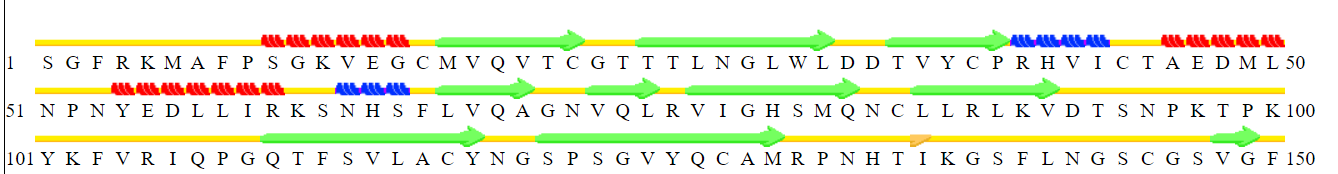

Q2. (a) 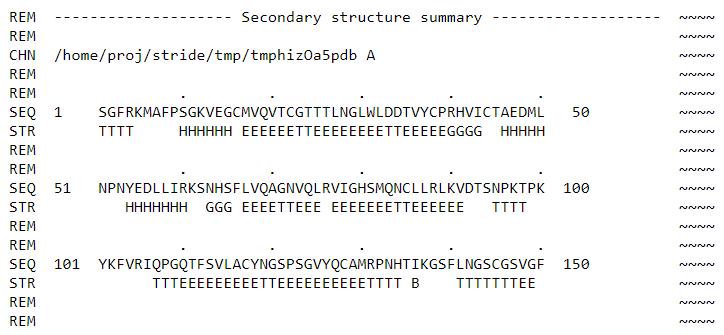

Given above is the output from the STRIDE server for the pdb file. Below is my program's output of the same sequence of amino acids:


SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDTVYCPRHVICTAEDMLNPNYEDLLIRKSNHSFLVQAGNVQLRVIGHSMQNCLLRLKVDTSNPKTPKYKFVRIQPGQTFSVLACYNGSPSGVYQCAMRPNHTIKGSFLNGSCGSVGF
THHHHHHHHHHHSSSSSSSSSSSSSSHHHHHHHHHSSSSHHHHHHHHHHHHTTHHHHHHHHHHSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSTTTTHSSSSSSSSSSSSSSSSSSSSSTTSSSSSSSSSSTTTHHHHHHTTTTTTTTT

As we can see it is differing in a lot many areas. The sequence starts with 4 turns and a bunch of coils in the secondary structure as found by STRIDE but my program outputs a bunch of Alpha Helixes after a turn. There is a lot of difference in the next area as well. STRIDE calculates 28-35 to be mostly Beta Strands but my algorithm makes it a Alpha Helix region. STRIDE also tells the areas having 310-helix but my algorithm doesn't. STRIDE also tells the region containing Bridge whereas my algorithm doesn't calculate for Bridges, coils, 310helixes.

I would say it is about 50% similar to the STRIDE problem. The following regions differ:
2-9, 13-16, 23-24, 27-35, 40-45, 51-53, 61-66, 71-72, 76, 84-85, 92-95, 99-109, 119-122, 131-132, 135-141, 148-150

(b) The differences that can be seen between the output given by my algorithm and the output given my STRIDE server is mostly due to the difference in our algorithms. My algorithm only finds the region of alpha helixes and beta strands based on the propensity values of amino acids which tell us if a group of amino acids is more likely to be part of alpha helix or beta strand. STRIDE however considers hydrogen bonds energies, and the angles between consecutive residues to find out 310-helixes, bridges and turns. My algorithm doesn't find out turns but it assumes that all which are not part of alpha helixes or beta strands are part of turns.